### Analysis of Algorithms

This notebook will allow you to explore the order of growth of basic Python operations.

To start our investigation, we have given you three different implementations of the `reverse_complement` function from mini-project 1.  In addition, we have provided you with a function that generates a random string of DNA.  This function will be useful for investigating how the running time of the various `reverse_complement` functions behave as you feed in larger and larger sequences of DNA.

First, read through the code and familiarize yourself with the three different implementations.  We have included a couple of doctests to  convince you that the implementations are correct.

In [66]:
""" Evaluate the performance of various DNA proessing algorithms """

from random import randint
import time

def generate_random_dna(n):
    """ Generate a random DNA sequence of length n """
    dna_list = []
    nucleotides = ['A','C','G','T']
    for i in range(n):
        r = randint(0,3)
        dna_list.append(nucleotides[r])
    return "".join(dna_list)

def get_complement(c):
    """ Returns the complimentary nucleotide to c """
    if c == 'A':
        return 'T'
    if c == 'C':
        return 'G'
    if c == 'G':
        return 'C'
    if c == 'T':
        return 'A'

def reverse_complement_1(dna):
    """ Method 2 for computing the reverse complementary sequence of DNA
        for the specfied DNA sequence
    
        dna: a DNA sequence represented as a string
        returns: the reverse complementary DNA sequence represented as a string
    >>> reverse_complement_1("ATGCCCGCTTT")
    'AAAGCGGGCAT'
    >>> reverse_complement_1("CCGCGTTCA")
    'TGAACGCGG'
    """
    return_val = ""
    for c in dna:
        return_val = get_complement(c) + return_val 
    return return_val

def reverse_complement_2(dna):
    """ Method 1 for Computing the reverse complementary sequence of DNA
        for the specfied DNA sequence
    
        dna: a DNA sequence represented as a string
        returns: the reverse complementary DNA sequence represented as a string
    >>> reverse_complement_2("ATGCCCGCTTT")
    'AAAGCGGGCAT'
    >>> reverse_complement_2("CCGCGTTCA")
    'TGAACGCGG'
    """
    return_val = []
    for c in reversed(dna):
        return_val.append(get_complement(c))
    return "".join(return_val)


def reverse_complement_3(dna):
    """ Method 1 for Computing the reverse complementary sequence of DNA
        for the specfied DNA sequence
    
        dna: a DNA sequence represented as a string
        returns: the reverse complementary DNA sequence represented as a string
    >>> reverse_complement_3("ATGCCCGCTTT")
    'AAAGCGGGCAT'
    >>> reverse_complement_3("CCGCGTTCA")
    'TGAACGCGG'
    """
    return_val = ""

    for c in reversed(dna):
        return_val = return_val + get_complement(c)
    return return_val

import doctest
doctest.testmod()

TestResults(failed=0, attempted=6)

Next, determine the order of growth of each of the three methods for copmuting the reverse complement.  You may find this text from ThinkPython useful:

> If you use the same loop to “add” a list of strings, the run time is quadratic because string concatenation is linear.

> The string method join is usually faster because it is linear in the total length of the strings. 

Next, you will be performing an experiment to see how these three techniques perform in practice.  What follows is a cell that times each of the implementations of `reverse_complement` on a DNA sequence of length given by the variable `dna_length`.  Try a few different values for `dna_length`.  What interesting trends do you observe?

In [117]:
def test_reverse_complement(f, dna_length):
    """ Returns the number of seconds for the function f
        to compute the reverse complement of a DNA sequence
        of length `dna_length` """
    dna = generate_random_dna(dna_length)
    start_time = time.time()
    rev_complement = f(dna)
    stop_time = time.time()
    return stop_time - start_time

dna_length = 1024

print "reverse_complement_1 took {} seconds". \
    format(test_reverse_complement(reverse_complement_1, dna_length))

print "reverse_complement_2 took {} seconds". \
    format(test_reverse_complement(reverse_complement_2, dna_length))

print "reverse_complement_3 took {} seconds". \
    format(test_reverse_complement(reverse_complement_3, dna_length))

reverse_complement_1 took 0.000585794448853 seconds
reverse_complement_2 took 0.000348091125488 seconds
reverse_complement_3 took 0.000343084335327 seconds


Next, we will be exploring the relationship between input size and running time in more detail.  Create a plot of running time (in seconds) versus input size using matplotlib.  If you haven't used matplotlib before, you may want to consult [this reference](http://matplotlib.org/users/pyplot_tutorial.html).  However, for you convenience here is an example of constructing a plot.

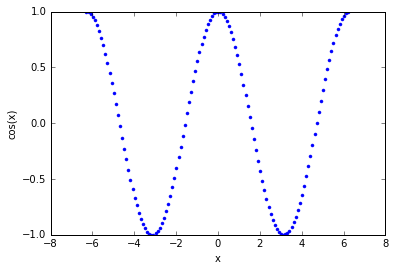

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arange
from math import pi, cos

xs = arange(-2*pi,2*pi,.1)
ys = []
for x in xs:
    ys.append(cos(x))

plt.plot(xs, ys, 'b.')
plt.ylabel('cos(x)')
plt.xlabel('x')
plt.show()

Create three plots, one for the running time of each implementation of `get_reverse_complement`.  The plot should show the running time for each implementation on inputs of different sizes.  In order to see interesting trends, you will want to search over an exponentially spaced range of input sizes (e.g. `xs = [1024, 2048, 4096, 8192, ...]`).  You should avoid testing on very small inputs since these will likely muddy your results.

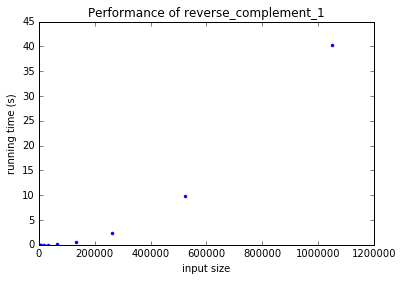

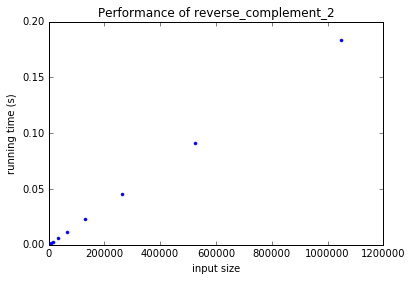

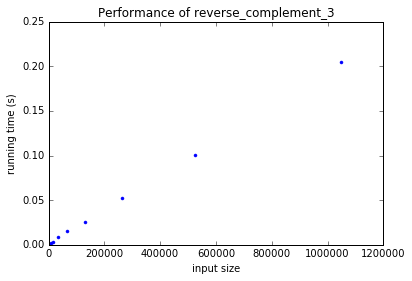

In [135]:
dna_lengths = [int(2**x) for x in range(10, 21)]
times_1 = [test_reverse_complement(reverse_complement_1, dna_length) for dna_length in dna_lengths]
times_2 = [test_reverse_complement(reverse_complement_2, dna_length) for dna_length in dna_lengths]
times_3 = [test_reverse_complement(reverse_complement_3, dna_length) for dna_length in dna_lengths]

plt.plot(dna_lengths, times_1, '.')
plt.xlabel('input size')
plt.ylabel('running time (s)')
plt.title('Performance of reverse_complement_1')
plt.show()

plt.plot(dna_lengths, times_2, '.')
plt.xlabel('input size')
plt.ylabel('running time (s)')
plt.title('Performance of reverse_complement_2')
plt.show()

plt.plot(dna_lengths, times_3, '.')
plt.xlabel('input size')
plt.ylabel('running time (s)')
plt.title('Performance of reverse_complement_3')
plt.show()

As a final analysis, create a single log-log plot that shows the running time of the three algorithms versus the size of the input.  To create a log-log plot, you can substitute the function `plt.plot` with `plt.loglog`.  To plot multiple quantities in the same plot, just call `plt.loglog` multiple times before calling `plt.show`.  Additionally, you can add a legend to your plot using following command (this assumes you called plt.loglog in the order specified below):

```plt.legend(['reverse_complement_1', 'reverse_complement_2', 'reverse_complement_3'], loc='best')```

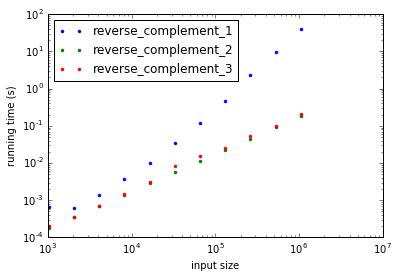

In [136]:
plt.loglog(dna_lengths, times_1, '.')
plt.loglog(dna_lengths, times_2, '.')
plt.loglog(dna_lengths, times_3, '.')
plt.xlabel('input size')
plt.ylabel('running time (s)')
plt.legend(['reverse_complement_1', 'reverse_complement_2', 'reverse_complement_3'], loc='best')
plt.show()

Assuming `reverse_complement_1` is $O(n^2)$ and the other two are $O(n)$, what quantity could you measure in the graph above that would tell you that?